# Data Augmentation Techniques
#### By Deen Leibovici 

In [133]:
#Load Libraries
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

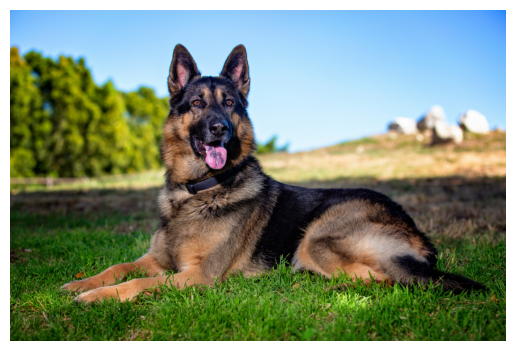

In [37]:
#Display Example Image
image = Image.open("img.png")
plt.imshow(image)
plt.axis("off");

### 1. Grayscale

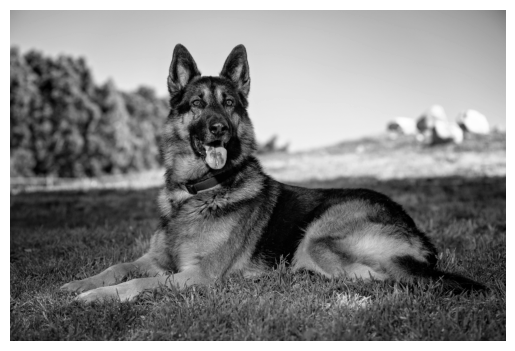

In [38]:
transform = transforms.Compose([
        transforms.Grayscale(),
       ])

img = transform(image)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show();

### 2. Horizontal Flip

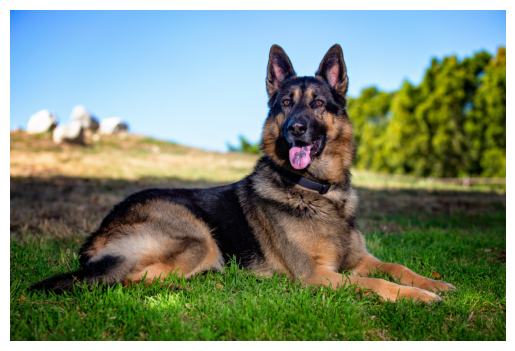

In [46]:
transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 3. Vertical Flip

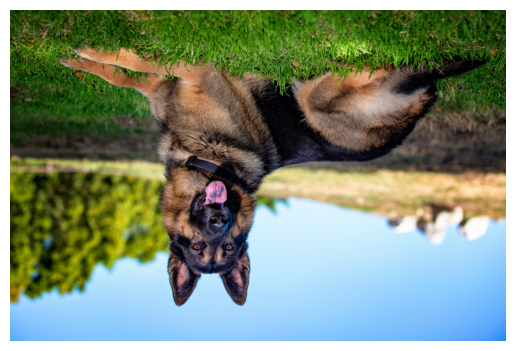

In [111]:
transform = transforms.Compose([
        transforms.RandomVerticalFlip(p=1),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 4. Random Crop

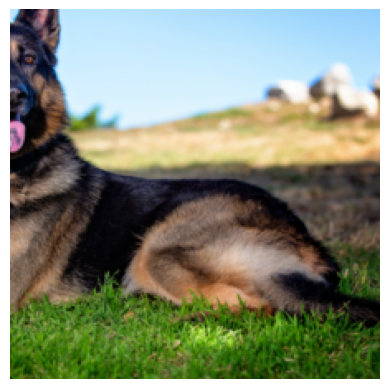

In [52]:
transform = transforms.Compose([
        transforms.RandomResizedCrop(size=(224, 224), antialias=True),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 5. Random Perspective

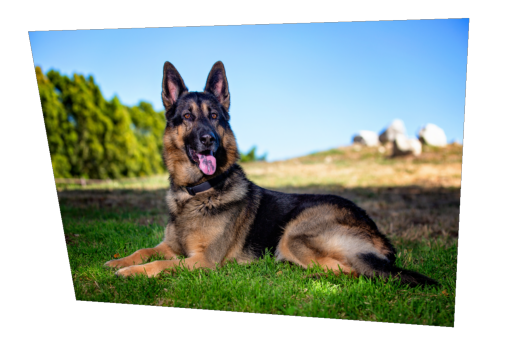

In [53]:
transform = transforms.Compose([
        transforms.RandomPerspective(distortion_scale=0.3, p=0.3),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();
#This is a png so empty background is not shown

### 6. Random Rotation

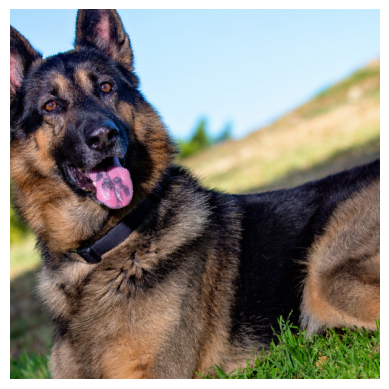

In [79]:
transform = transforms.Compose([
        transforms.RandomRotation(degrees=(0, 40)),
        transforms.CenterCrop(size=(500, 500)),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();
#I also cropped image to get rid of empty part of image

### 7. Resize

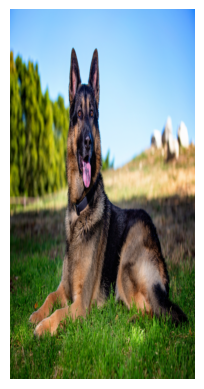

In [91]:
transform = transforms.Compose([
        transforms.Resize(size = (1000,500)),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 8. Gaussian Blur

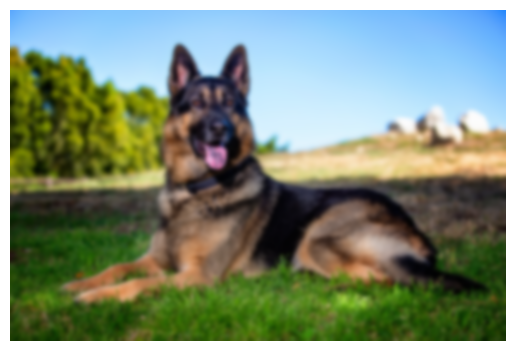

In [103]:
transform = transforms.Compose([
        transforms.GaussianBlur(kernel_size=111, sigma=(0.1, 10.0)),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 9. Image Brightness

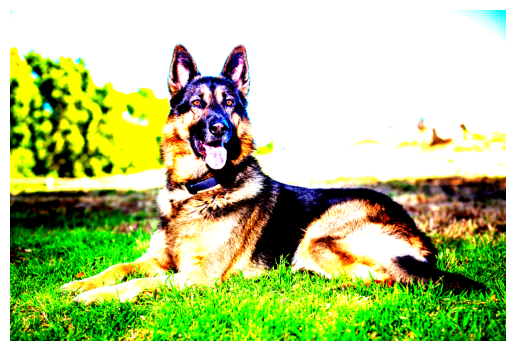

In [130]:
transform = transforms.Compose([
transforms.ColorJitter(brightness=6, contrast=5, saturation=5, hue=0),
       ])

img = transform(image)
plt.imshow(img)
plt.axis("off")
plt.show();

### 10. Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


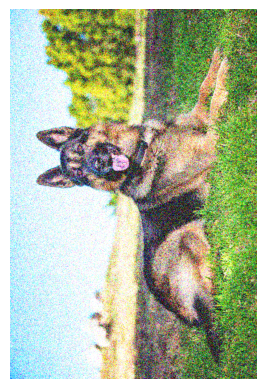

In [193]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

rgb_im = image.convert('RGB')
rgb_im.save('img.jpeg')
img_modified = Image.open("img.jpeg")


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    AddGaussianNoise(0., 1.),
       ])


img = transform(np.array(img_modified))

plt.imshow(np.transpose(img))
plt.axis("off")
plt.show();
#Noise is not in the pytorch transforms library 
#so I figured out how to implement it manually
#This was achieved by making a custom function
#as well as performing array modifications
#to get it working but unfortunately I rotated the image by accident

